## Introduction:

This competition asks you to determine whether a loan will default, as well as the loss incurred if it does default. Unlike traditional finance-based approaches to this problem, where one distinguishes between good or bad counterparties in a binary way, we seek to anticipate and incorporate both the default and the severity of the losses that result. In doing so, we are building a bridge between traditional banking, where we are looking at reducing the consumption of economic capital, to an asset-management perspective, where we optimize on the risk to the financial investor.

This competition is sponsored by researchers at Imperial College London.

Competition Link ==> 
https://www.kaggle.com/c/loan-default-prediction

The data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with over two hundred thousand observations and nearly 800 features.  Each observation is independent from the previous. 

For each observation, it was recorded whether a default was triggered. In case of a default, the loss was measured. This quantity lies between 0 and 100. It has been normalised, considering that the notional of each transaction at inception is 100. For example, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0. You are asked to predict the losses for each observation in the test set.

In [1]:
## data manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import csv

## plotting .. 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


## Prediction
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train_loan_data.csv')

In [4]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [5]:
np.shape(df)

(105471, 771)

In [29]:
df.columns

Index([u'id', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9',
       ...
       u'f770', u'f771', u'f772', u'f773', u'f774', u'f775', u'f776', u'f777',
       u'f778', u'loss'],
      dtype='object', length=771)

Here we go .. 

untitiled dataset related to banking sector .. for 105471 customer have about 771 features  ... actually they were about 800 features .. but some of them already removed from the competition board as these features have been related to leakage .. let's make a double check if they are still there ! 

In [22]:
if set(['f11','f12', 'f462', 'f463', 'f473', 'f474', 'f602', 'f603', 'f605']).issubset(df.columns):
    print "Exist!"
else:
    print "Removed!"

Removed!


Well .. they are already removed !

In [24]:
df.isnull().any()

id      False
f1      False
f2      False
f3      False
f4      False
f5      False
f6      False
f7       True
f8       True
f9      False
f10     False
f13     False
f14      True
f15      True
f16     False
f17      True
f18      True
f19      True
f20      True
f21      True
f22      True
f23      True
f24     False
f25     False
f26      True
f27     False
f28     False
f29     False
f30     False
f31      True
        ...  
f750     True
f751     True
f752     True
f753     True
f754     True
f755     True
f756     True
f757     True
f758     True
f759     True
f760     True
f761     True
f762     True
f763     True
f764    False
f765     True
f766    False
f767    False
f768    False
f769    False
f770    False
f771    False
f772    False
f773    False
f774     True
f775     True
f776    False
f777    False
f778    False
loss    False
Length: 771, dtype: bool

mmm it seems that a lot of varaibles have missing values .. 

let's sum them up to check their severity .. 

In [25]:
df.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7       182
f8       101
f9         0
f10        0
f13        0
f14      100
f15       48
f16        0
f17      159
f18       23
f19       23
f20      460
f21     1840
f22     1698
f23      698
f24        0
f25        0
f26      698
f27        0
f28        0
f29        0
f30        0
f31      698
        ... 
f750     853
f751    1458
f752       2
f753       2
f754       2
f755       2
f756     233
f757     800
f758     800
f759     800
f760    1334
f761     158
f762     158
f763    1840
f764       0
f765       1
f766       0
f767       0
f768       0
f769       0
f770       0
f771       0
f772       0
f773       0
f774    1064
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 771, dtype: int64

In [27]:
max(df.isnull().sum())

18833

Luckily .. none of them are sever .. they are at most 18833 records in a single variable ! .. 

before deciding how to handle them .. let's check the type of each variable .. 

In [30]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index([u'id', u'f1', u'f2', u'f4', u'f5', u'f6', u'f13', u'f16', u'f24',
        u'f25', u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f68', u'f73',
        u'f74', u'f284', u'f285', u'f286', u'f287', u'f293', u'f294', u'f295',
        u'f296', u'f301', u'f302', u'f303', u'f304', u'f309', u'f310', u'f311',
        u'f312', u'f317', u'f318', u'f319', u'f320', u'f325', u'f326', u'f327',
        u'f328', u'f335', u'f336', u'f337', u'f345', u'f354', u'f362', u'f371',
        u'f379', u'f380', u'f381', u'f382', u'f400', u'f403', u'f408', u'f417',
        u'f418', u'f427', u'f447', u'f465', u'f467', u'f477', u'f478', u'f480',
        u'f521', u'f530', u'f531', u'f532', u'f597', u'f599', u'f656', u'f657',
        u'f658', u'f659', u'f670', u'f674', u'f681', u'f693', u'f699', u'f700',
        u'f701', u'f702', u'f722', u'f725', u'f728', u'f729', u'f730', u'f731',
        u'f732', u'f736', u'f741', u'f764', u'f770', u'f776', u'f777', u'f778',
        u'loss'],
       dtype=

Okay, it seems that the majority of the variables are int including the predictor (loss) variable .. as expected ! .. 

However, the dataset contains floats and catigorical data as well .. 

Let's check the correlation between the numerical variables ..

In [31]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
corr.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
f1,1.000000,-0.210388,-0.000370,0.782389,-0.269849,0.102250,-0.160392,-0.174056,0.972323,0.998662,...,-0.081408,-0.044220,0.036631,-0.031180,0.003592,0.067034,0.078637,0.873927,-0.270134,-0.008231
f2,-0.210388,1.000000,0.003149,-0.215980,0.221009,0.091765,-0.131591,-0.155965,-0.248444,-0.218659,...,0.078232,-0.020417,0.044855,-0.063950,-0.023559,-0.176774,-0.097982,-0.225693,0.221553,-0.000588
f3,-0.000370,0.003149,1.000000,0.000040,0.002255,0.003789,0.001305,-0.003281,-0.000905,-0.000504,...,0.001931,0.002581,-0.002818,0.002964,-0.003372,-0.005909,-0.001653,0.000149,-0.000504,0.000785
f4,0.782389,-0.215980,0.000040,1.000000,-0.256425,0.119798,-0.231372,-0.209896,0.832383,0.794265,...,-0.108024,-0.088417,0.085026,-0.082677,-0.026078,0.037114,0.038133,0.875710,-0.262051,-0.005019
f5,-0.269849,0.221009,0.002255,-0.256425,1.000000,-0.055828,0.108960,-0.006699,-0.284146,-0.273604,...,0.084125,0.068390,-0.065340,0.063015,0.044906,-0.013944,-0.036634,-0.303485,0.770800,0.003902


mmm f1 has high correlation with few variables i.e. f4, f9, f777 ..

Is is the Id variable ?! 

however, f4 is already correlated with f9 ! .. 

also, f4 highly correlation with f777 ..

In [33]:
df['f1'].head()

0    126
1    121
2    126
3    134
4    109
Name: f1, dtype: int64

I think it is not the Id !! ..

Note that f777 is already stated in the competition description as categorical variable .. hoewever, it seems to appear in our correlation matrix .. let's look at it .. !

In [52]:
df['f777'].unique()

array([0, 1])

mmmm it's a binary variable .. this is why it has been considered as int in the correlation matrix .. 

Let's visualize the correlation as a heatmap for better demonestration .. 

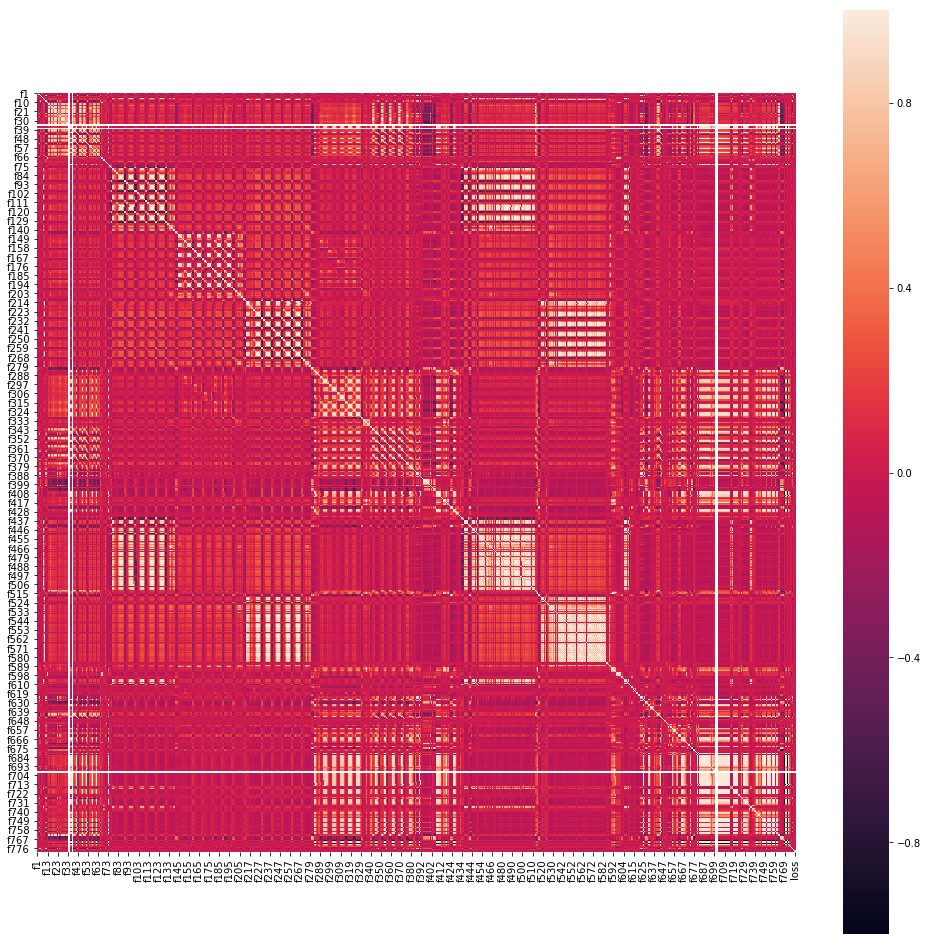

In [50]:
plt.figure(figsize = (17, 17))
sns.heatmap(corr, vmax = 1, square = True)

mmmm it seems that the order of the correlation matrix is just sequantially .. it doesn't indicate the names of the features ! .. i.e. f4 is just f45 in the 4th position ! .. 

However, all in all and as seen in the above heatmap .. there is correlation between some variables and they are not totally independent ! 

In [46]:
np.corrcoef(df['f719'], df['f701'])

array([[ nan,  nan],
       [ nan,  nan]])

In [53]:
df['f701'].head(), df['f719'].head()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: f701, dtype: int64, 0     3.05466
 1     2.85552
 2     7.50467
 3     3.13951
 4    14.59923
 Name: f719, dtype: float64)

mmmmm .. okay, let's investigate which of these variables has high correlation with the (loss) !

In [54]:
k = 10 #number of variables for heatmap
cols_ = corr.nlargest(k, 'loss')['loss'].index # positions of the variables that have largest correlation with the salesprice
cols_

Index([u'loss', u'f471', u'f536', u'f674', u'f67', u'f670', u'f597', u'f599',
       u'f68', u'f221'],
      dtype='object')

In [55]:
cm = np.corrcoef(df[cols_].values.T)
cm

array([[ 1.        ,         nan,         nan,  0.01942627,  0.01473967,
         0.01459467,  0.01375753,  0.01375753,  0.0129867 ,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.01942627,         nan,         nan,  1.        ,  0.1676053 ,
         0.11074811,  0.11667745,  0.11667745,  0.07543166,         nan],
       [ 0.01473967,         nan,         nan,  0.1676053 ,  1.        ,
         0.59749664,  0.86417167,  0.86417167,  0.89407396,         nan],
       [ 0.01459467,         nan,         nan,  0.11074811,  0.59749664,
         1.        ,  0.79014815,  0.79014815,  0.69986951,         nan],
       [ 0.01375753,         nan,         nan,  0.11667745,  0.86417167,
         0.79014815,  1.        ,  1.        

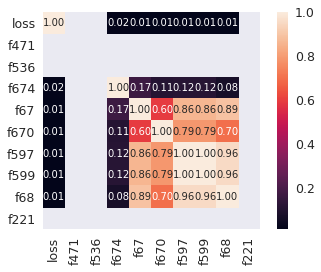

In [56]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_.values, xticklabels=cols_.values)

well, now we have something to tell .. 

our variable of interest (loss) doesn't depend on a unique variable .. it deosn't have strong relationship with any other variables ! ... 

yet, the above heatmap shows that some other variables need more investiation i.e. f67, f670, f597 and f599 as they highly correlated with each other ! 

In [58]:
df['loss'].unique()

array([  0,   1,  16,  19,   4,  11,  21,   2,   9,   5,   3,   7,  13,
         6,  25,  44,  17, 100,  10,   8,  65,  15,  12,  29,  22,  20,
        18,  41,  55,  28,  23,  14,  38,  42,  33,  27,  24,  39,  26,
        31,  35,  64,  32,  54,  37,  61,  79,  51,  43,  77,  47,  36,
        46,  81,  78,  60,  45,  85,  84,  34,  90,  40,  50,  92,  74,
        62,  53,  59,  89,  48,  30,  49,  99,  73,  95,  83,  56,  70,
        71,  68,  94,  72,  57,  58,  52,  63,  69,  76,  80])

mmm descrete values ! ... this might interpret the weak correlation between loss and the other variables !

## Visualizing Loss:

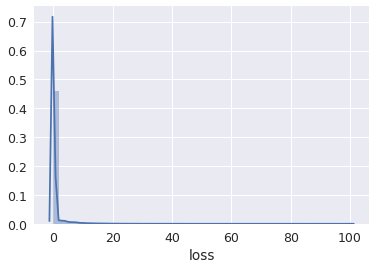

In [59]:
sns.distplot(df['loss'])

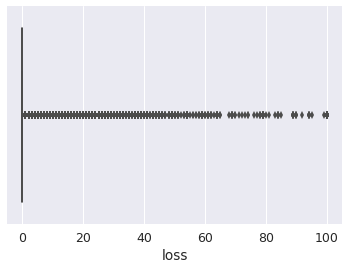

In [62]:
sns.boxplot(df['loss'])

In [63]:
df.loss.describe()

count    105471.000000
mean          0.799585
std           4.321120
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: loss, dtype: float64

The problem tends to be more challenging :) ..

Our variable of interest (loss) is highly skewed ! .. 

should we remove zeros and plot its log !! .. 

One minute .. zeros here already have strong meaning .. it means that the loan is not defaulted and in case of a default, the loss was measured. is the loss is i.e. 60 .. this means that 40 is reimbursed .. 

well, let's visualize those non-defaulted customers .. 

In [67]:
defualt_loss = df.loc[df['loss'] > 0]['loss']
defualt_loss.head()

7      1
16    16
26    19
50     4
64    11
Name: loss, dtype: int64

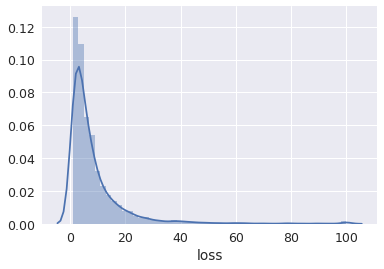

In [68]:
sns.distplot(defualt_loss)

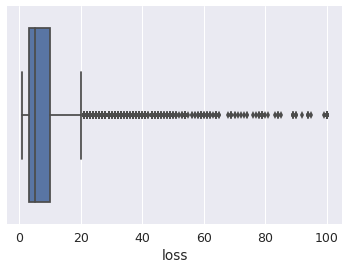

In [69]:
sns.boxplot(defualt_loss)

:) .. more appealing graphs .. with the +ve skeweness magnified ..  

## Visualizing other variables .. 

Back to our variables of interest .. f67, f670, f597 and f599

let's digging deeper in them .. 